# Homework 2. Training networks in PyTorch

Это домашнее задание посвящено отработки навыков по написанию и обучению нейронных сетей. Ваше задание реализовать обучение нейронной сети и выполнить задания по анализу сети в конце ноутбука. Удачи!

<font color='red'> **Дедлайн 4 октября 23:59 (жесткий)**  </font>

### Data loading in pytorch

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
import torch.utils.data

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

You will works with a MNIST dataset. It contains grayscale images of handwritten digits of size 28 x 28. The number of training objects is 60000.


In pytorch, there is a special module to download MNIST. But for us it is more convinient to load the data ourselves.

In [3]:
from utils import load_mnist

In [4]:
X_train, y_train, X_test, y_test = load_mnist()

The code below prepares short data (train and val) for seminar purposes (use this data to quickly learn model on CPU and to tune the hyperparameters). Also, we prepare the full data (train_full and test) to train a final model.

In [5]:
# shuffle data
np.random.seed(0)
idxs = np.random.permutation(np.arange(X_train.shape[0]))
X_train, y_train = X_train[idxs], y_train[idxs]

X_train.shape

(60000, 1, 28, 28)

Pytorch offers convinient class DataLoader for mini batch generation. You should pass instance of Tensor Dataset to it.

In [6]:
def get_loader(X, y, batch_size=64):
    train = torch.utils.data.TensorDataset(torch.from_numpy(X).float(),
                                       torch.from_numpy(y).long())
    train_loader = torch.utils.data.DataLoader(train,
                                               batch_size=batch_size)
    return train_loader

# for final model:
train_loader_full = get_loader(X_train, y_train)
test_loader = get_loader(X_test, y_test)
# for validation purposes:
train_loader = get_loader(X_train[:15000], y_train[:15000])
val_loader = get_loader(X_train[15000:30000], y_train[15000:30000])

/tmp/ipykernel_368293/2761436466.py:3: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  torch.from_numpy(y).long())


In [7]:
# check number of objects
val_loader.dataset.tensors[0].shape

torch.Size([15000, 1, 28, 28])

### Building LeNet-5

Convolutional layer (from Anton Osokin's presentation):
![slide](https://github.com/nadiinchi/dl_labs/raw/master/convolution.png)

You need to implement Lenet-5:

![Архитектура LeNet-5](https://www.researchgate.net/profile/Vladimir_Golovko3/publication/313808170/figure/fig3/AS:552880910618630@1508828489678/Architecture-of-LeNet-5.png)

Construct a network according to the image and code examples given above. Use ReLU nonlinearity (after all linear and convolutional layers). The network must support multiplying the number of convolutions in each convolutional layer by k.

Please note that on the scheme the size of the image is 32 x 32 but in our code the size is 28 x 28.

Do not apply softmax at the end of the forward pass!

### <font color='red'>[TODO] Написание архитектуры Le-Net-5 </font>

В этой части вам нужно реализовать архитектуру Le-Net-5, но учтите, что на вход изображения приходит 28x28.

Для того, написать архитектуру используйте [nn.Conv2D](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), [nn.AvgPool2d](https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html), [nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html). Ориентируйтесь на картинку сверху в реализации

In [8]:
class CNN(nn.Module):
    def __init__(self, k=1):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.layer1(x)  #;print(x.shape)
        x = self.layer2(x) #;print(x.shape)
        x = x.reshape(x.size(0), -1)
        x = self.fc(x) #;print(x.shape)
        x = self.relu(x) #;print(x.shape)
        x = self.fc1(x) #;print(x.shape)
        x = self.relu1(x) #;print(x.shape)
        x = self.fc2(x) #;print(x.shape)
        return x

# class CNN(nn.Module):
#     def __init__(self, k=1):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(3,3))
#         self.relu1 = nn.ReLU()
#         self.pooling1 = nn.AvgPool2d(kernel_size=1, stride=1) # ВТФ, как сделать 14 на 14 со stride =2 ??
        
#         self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
#         self.relu2 = nn.ReLU()
#         self.pooling2 = nn.AvgPool2d(kernel_size=2, stride=2)
        
#         self.layer1 = nn.Linear(in_features=16*5*5, out_features=120) 
#         self.layer2 = nn.Linear(in_features=120, out_features=84)
#         self.relu3 = nn.ReLU()
#         self.layer3 = nn.Linear(in_features=84, out_features=10)

#     def forward(self, x):
#         x = self.pooling1(self.relu1(self.conv1(x))) ;print(x.size())
#         x = self.pooling2(self.relu2(self.conv2(x))) ;print(x.size())
#         x = x.view(x.size(0), -1)  ; print(x.size())# to 1 dim 
#         x = self.layer1(x); print(x.size())
#         x = self.layer2(x);print(x.size())
#         x = self.relu3(x);print(x.size())
#         x = self.layer3(x);print(x.size())
#         return x

In [9]:
cnn = CNN( )

In [10]:
def count_parameters(model):
    return sum(param.data.numpy().size for param \
               in model.parameters() if param.requires_grad)

count_parameters(cnn)

61750

### Training

Let's define the loss function:

In [11]:
criterion = nn.CrossEntropyLoss() # loss includes softmax


In [12]:
cnn = CNN( )
x = torch.randn(121,1, 28, 28)
out = cnn.forward(x)
# train_labels = torch.randn(121)

# print(out.shape)
# print(train_labels.shape)
# # print(out.view(1,-1).shape)
# # print(out.view(-1,10).shape)
# print(criterion(out, train_labels.long()))

In [13]:
# # Example of target with class indices
# loss = nn.CrossEntropyLoss()
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.empty(3, dtype=torch.long).random_(5)
# print(input.shape)
# print(target.shape)

# output = loss(input, target)
# print(output)
# # Example of target with class probabilities
# # input = torch.randn(6, 10, requires_grad=True)
# # print(input.shape)
# # inp = input.softmax(dim=0)
# # print(inp.shape)
# # output = loss(input, target)
# # print(output)

In [106]:
x = torch.randn(6 , 10 )
print(x)
y = x.argmax(dim=1)
print(y)
print(y.shape)



tensor([[-1.3377,  0.7220, -0.7980,  0.0575,  0.0366, -0.0169, -0.2435,  1.6351,
         -1.6315, -0.0152],
        [-1.3192,  0.5660,  0.6348, -0.3952, -0.1305, -0.0081, -0.6950, -0.4764,
          1.0116,  2.4914],
        [-0.5184, -0.3634,  0.7521, -1.0506,  0.6276, -0.8695, -0.5964,  0.0771,
          0.0690,  1.4731],
        [-0.4069, -0.5440, -0.8986,  0.2239, -0.6545,  2.5965, -1.0422,  0.7993,
         -0.1398,  0.2227],
        [ 0.2114, -0.3445,  1.3141, -1.3190, -0.6682, -0.0740, -0.0212,  0.5821,
         -0.9052, -0.8497],
        [-1.0001,  0.7683,  0.2694,  0.6187, -1.8202,  1.5325,  0.0806, -0.5465,
         -1.4437, -0.1429]])
tensor([7, 9, 9, 5, 2, 5])
torch.Size([6])


Also, define a device where to store the data and the model (cpu or gpu):

In [14]:
device = torch.device('cpu')
# device = torch.device('cuda') # Uncomment this to run on GPU
cnn = cnn.to(device)

During training, we will control the quality on the training and validation set. This produces duplicates of the code. That's why we will define a function evaluate_loss_acc to evaluate our model on different data sets. In the same manner, we define function train_epoch to perform one training epoch on traiing data. Please note that we will compute the training loss _after_ each epoch (not averaging it during epoch).

In the propotypes, train and eval modes are noted. In our case, we don't need them (because we don't use neither dropout nor batch normalization). However, we will switch the regime so you can use this code in the future.

### <font color='red'>[TODO] Реализуйте функции обучение модели </font>

В части вам нужно написать циклы обучения моделей, вы можете ориентировать на ноутбук семинара при их выполнении

In [15]:
def train_epoch(model, optimizer, train_loader, criterion, device):
    """
    for each batch
    performs forward and backward pass and parameters update

    Input:
    model: instance of model (example defined above)
    optimizer: instance of optimizer (defined above)
    train_loader: instance of DataLoader

    Returns:
    nothing

    Do not forget to set net to train mode!
    """
    ### your code here
    model.train()
    for it, traindata in enumerate(train_loader):
        train_inputs, train_labels = traindata
        train_inputs = train_inputs.to(device) 
        train_labels = train_labels.to(device)
        train_labels = torch.squeeze(train_labels)

        model.zero_grad()        
        # train_inputs = train_inputs.permute(0,1,2,3)
        # print(train_inputs.shape)
        # print(train_inputs.t())
        output = model(train_inputs)
        # output = model(train_inputs.t()) # pay attention here!
        # print(train_labels.shape)
        loss = criterion(output, train_labels.long())
        loss.backward()
        optimizer.step()


def evaluate_loss_acc(loader, model, criterion, device):
    """
    Evaluates loss and accuracy on the whole dataset

    Input:
    loader:  instance of DataLoader
    model: instance of model (examle defined above)

    Returns:
    (loss, accuracy)

    Do not forget to set net to eval mode!
    """
    ### your code here
    model.eval()
    total_acc = 0.0
    total_loss = 0.0
    total = 0.0
    for it, data in enumerate(loader):
        inputs, labels = data
        inputs = inputs.to(device) 
        labels = labels.to(device)
        labels = torch.squeeze(labels)

        output = model(inputs) # pay attention here!
        loss = criterion(output, labels.long())# + torch.norm(WW^T - I)
        total_loss += loss.item()
        # print(labels)
        # calc testing acc        
        # pred = output.view(-1) > 0.5
        pred = output.argmax(dim=1)
        correct = pred == labels.byte()
        total_acc += torch.sum(correct).item() / len(correct)

    total = it + 1
    return total_loss / total, total_acc / total

def train(model, opt, train_loader, test_loader, criterion, n_epochs, \
          device, verbose=True):
    """
    Performs training of the model and prints progress

    Input:
    model: instance of model (example defined above)
    opt: instance of optimizer
    train_loader: instance of DataLoader
    test_loader: instance of DataLoader (for evaluation)
    n_epochs: int

    Returns:
    4 lists: train_log, train_acc_log, val_log, val_acc_log
    with corresponding metrics per epoch
    """
    train_log, train_acc_log = [], []
    val_log, val_acc_log = [], []

    for epoch in range(n_epochs):
        train_epoch(model, opt, train_loader, criterion, device)
        train_loss, train_acc = evaluate_loss_acc(train_loader,
                                                  model, criterion,
                                                  device)
        val_loss, val_acc = evaluate_loss_acc(test_loader, model,
                                              criterion, device)

        train_log.append(train_loss)
        train_acc_log.append(train_acc)

        val_log.append(val_loss)
        val_acc_log.append(val_acc)

        if verbose:
             print (('Epoch [%d/%d], Loss (train/test): %.4f/%.4f,'+\
               ' Acc (train/test): %.4f/%.4f' )
                   %(epoch+1, n_epochs, \
                     train_loss, val_loss, train_acc, val_acc))

    return train_log, train_acc_log, val_log, val_acc_log

### <font color='red'>[TODO] Обучение модели </font>

Train the neural network, using defined functions. Use Adam as an optimizer, learning_rate=0.001, number of epochs = 20. For hold out, use val_loader, not test_loader.

In [22]:
### your code here
cnn = CNN()
learning_rate = 0.001
optimizer = optim.Adam(cnn.parameters(), lr=learning_rate)
num_epochs = 10
%time 
a, b, c, d = train(train_loader=train_loader, test_loader=test_loader, model=cnn, criterion=criterion,opt=optimizer, device=device, n_epochs=num_epochs)
print( a ,b ,c ,d)

CPU times: user 10 µs, sys: 1 µs, total: 11 µs
Wall time: 20 µs
Epoch [1/10], Loss (train/test): 0.0986/0.1011, Acc (train/test): 0.9714/0.9715
Epoch [2/10], Loss (train/test): 0.0609/0.0710, Acc (train/test): 0.9810/0.9786
Epoch [3/10], Loss (train/test): 0.0464/0.0592, Acc (train/test): 0.9849/0.9820
Epoch [4/10], Loss (train/test): 0.0570/0.0738, Acc (train/test): 0.9803/0.9767
Epoch [5/10], Loss (train/test): 0.0385/0.0583, Acc (train/test): 0.9866/0.9814
Epoch [6/10], Loss (train/test): 0.0258/0.0537, Acc (train/test): 0.9920/0.9837
Epoch [7/10], Loss (train/test): 0.0165/0.0472, Acc (train/test): 0.9945/0.9856
Epoch [8/10], Loss (train/test): 0.0171/0.0554, Acc (train/test): 0.9938/0.9845
Epoch [9/10], Loss (train/test): 0.0131/0.0558, Acc (train/test): 0.9950/0.9848
Epoch [10/10], Loss (train/test): 0.0152/0.0580, Acc (train/test): 0.9942/0.9830
[0.09861898098854309, 0.060867395418438504, 0.04643263722413239, 0.05703876911801226, 0.03853334727786244, 0.02578456551951178, 0.01651

### <font color='red'>[TODO] Проведите эксперименты с моделью </font>


### Choosing  learning_rate and batch_size

Plot accuracy on the training and testing set v. s. training epoch for different learning parameters: learning rate$ \in \{0.0001, 0.001, 0.01\}$, batch size $\in \{64, 256\}$.

The best option is to plot training curves on the left graph and validation curves on the right graph with the shared y axis (use plt.ylim).

How do learning rate and batch size affect the final quality of the model?

In [150]:
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [64, 256]
num_epochs = 30
results = []


for lr in learning_rates:
    for batch_size in batch_sizes:
        print('---------------------------------------',f"Learning Rate: {lr}, Batch Size: {batch_size} --------------------------------------------------------")
        train_loader = get_loader(X_train[:15000], y_train[:15000] , batch_size=batch_size)
        test_loader = get_loader(X_test, y_test, batch_size=batch_size)
        cnn = CNN()
        optimizer = optim.Adam(cnn.parameters(), lr=lr)
        %time 
        loss_train, acc_train, loss_test, acc_test = train(train_loader=train_loader, test_loader=test_loader, model=cnn, criterion=criterion,opt=optimizer, device=device, n_epochs=num_epochs)
        results.append([acc_test,loss_test]) 


--------------------------------------- Learning Rate: 0.01, Batch Size: 64 --------------------------------------------------------
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 12.6 µs
Epoch [1/30], Loss (train/test): 0.1059/0.1247, Acc (train/test): 0.9659/0.9622
Epoch [2/30], Loss (train/test): 0.0507/0.0685, Acc (train/test): 0.9836/0.9790
Epoch [3/30], Loss (train/test): 0.0700/0.0966, Acc (train/test): 0.9785/0.9717
Epoch [4/30], Loss (train/test): 0.0320/0.0599, Acc (train/test): 0.9904/0.9833
Epoch [5/30], Loss (train/test): 0.0423/0.0701, Acc (train/test): 0.9872/0.9790
Epoch [6/30], Loss (train/test): 0.0334/0.0804, Acc (train/test): 0.9891/0.9790
Epoch [7/30], Loss (train/test): 0.0306/0.0850, Acc (train/test): 0.9913/0.9794
Epoch [8/30], Loss (train/test): 0.0215/0.0745, Acc (train/test): 0.9928/0.9799
Epoch [9/30], Loss (train/test): 0.0355/0.0843, Acc (train/test): 0.9887/0.9792
Epoch [10/30], Loss (train/test): 0.0326/0.0960, Acc (train/test): 0.9892/0.9778
Ep

In [153]:
print(learning_rates )
print(batch_sizes)
for j in results :
    print(j[0])

[0.01, 0.001, 0.0001]
[64, 256]
[0.9621815286624203, 0.9790007961783439, 0.9717356687898089, 0.98328025477707, 0.9790007961783439, 0.9790007961783439, 0.9793988853503185, 0.9798964968152867, 0.9791998407643312, 0.9778065286624203, 0.9799960191082803, 0.9798964968152867, 0.9769108280254777, 0.9758160828025477, 0.9821855095541401, 0.9818869426751592, 0.9811902866242038, 0.9791998407643312, 0.9766122611464968, 0.9827826433121019, 0.984375, 0.9795979299363057, 0.981687898089172, 0.9850716560509554, 0.98328025477707, 0.9782046178343949, 0.9790007961783439, 0.9828821656050956, 0.979796974522293, 0.9850716560509554]
[0.96845703125, 0.9771484375, 0.96943359375, 0.97802734375, 0.97880859375, 0.9798828125, 0.9779296875, 0.9716796875, 0.98564453125, 0.97861328125, 0.9830078125, 0.98232421875, 0.98388671875, 0.9806640625, 0.981640625, 0.98359375, 0.98505859375, 0.98466796875, 0.97998046875, 0.9845703125, 0.98193359375, 0.98193359375, 0.9818359375, 0.98310546875, 0.98291015625, 0.982421875, 0.98359

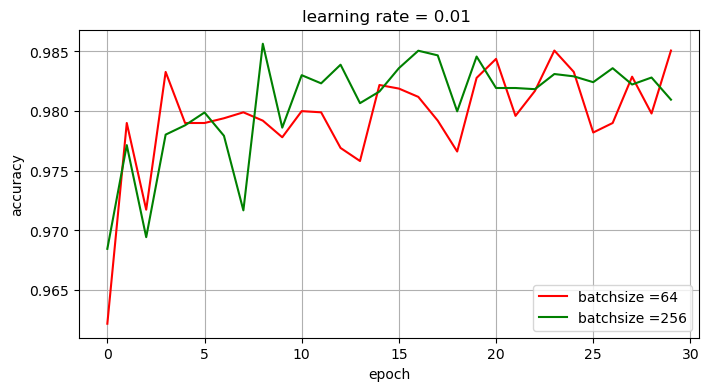

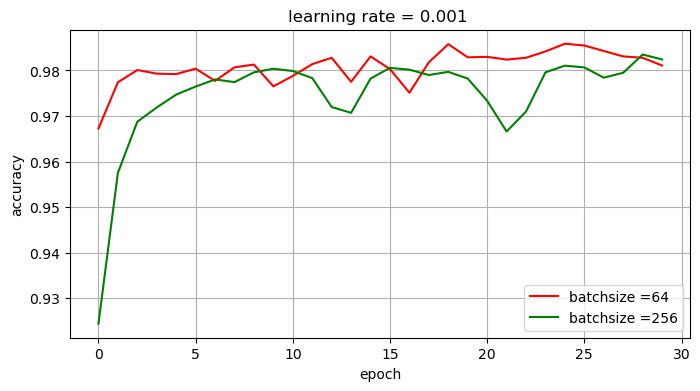

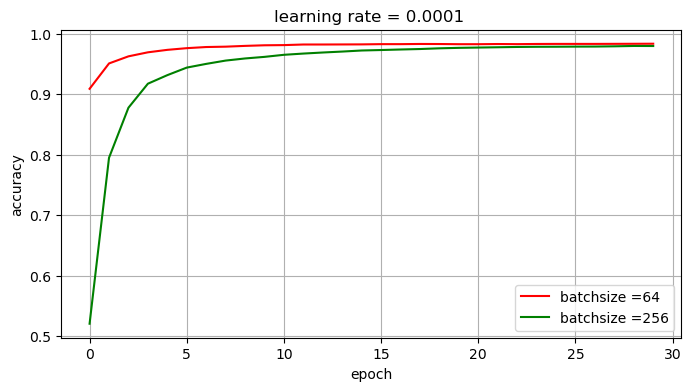

In [152]:
import numpy as np
import matplotlib.pyplot as plt



pairs = [(results[i][0], results[i+1][0]) for i in range(0, len(results), 2)]



for i in range(3) :
    plt.figure(figsize =(8,4))
    plt.plot(pairs[i][0] , color='red' , label='batchsize ='+ str(batch_sizes[0]))
    plt.plot(pairs[i][1] , color='green' , label='batchsize ='+ str(batch_sizes[1]))
    plt.legend()
    plt.title(f'learning rate = {learning_rates[i]} ')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.grid(True)
    plt.show()



### Changing the architecture

Try to modify our architecture: increase the number of filters and to reduce the number of fully-connected layers.

Insert numbers in the brackets:
* LeNet-5 classic (6 and 16 convolutions):  training acc: ( )  validation acc: ( )
* Number of convolutions x 4 (24 и 64 convolutions):  training acc: ( )  validation acc: ( )
* Removing fully connected layer: the previous network with 1 FC layer: training acc: ( )  validation acc: ( )
    
    

## Без модификаций с лушчими параметрами :

In [148]:
learning_rate = 0.01
batch_size = 64
num_epochs = 20
train_loader = get_loader(X_train, y_train , batch_size=batch_size)
test_loader = get_loader(X_test, y_test, batch_size=batch_size)
cnn = CNN()
optimizer = optim.Adam(cnn.parameters(), lr=lr)
%time 
loss_train, acc_train, loss_test, acc_test = train(train_loader=train_loader, test_loader=test_loader, model=cnn, criterion=criterion,opt=optimizer, device=device, n_epochs=num_epochs)



CPU times: user 25 µs, sys: 1e+03 ns, total: 26 µs
Wall time: 52.7 µs
Epoch [1/20], Loss (train/test): 0.1602/0.1518, Acc (train/test): 0.9565/0.9594
Epoch [2/20], Loss (train/test): 0.0981/0.0955, Acc (train/test): 0.9723/0.9721
Epoch [3/20], Loss (train/test): 0.0751/0.0754, Acc (train/test): 0.9784/0.9777
Epoch [4/20], Loss (train/test): 0.0622/0.0645, Acc (train/test): 0.9820/0.9805
Epoch [5/20], Loss (train/test): 0.0536/0.0577, Acc (train/test): 0.9845/0.9827
Epoch [6/20], Loss (train/test): 0.0474/0.0531, Acc (train/test): 0.9862/0.9831
Epoch [7/20], Loss (train/test): 0.0427/0.0497, Acc (train/test): 0.9875/0.9842
Epoch [8/20], Loss (train/test): 0.0388/0.0472, Acc (train/test): 0.9887/0.9851
Epoch [9/20], Loss (train/test): 0.0355/0.0455, Acc (train/test): 0.9893/0.9857
Epoch [10/20], Loss (train/test): 0.0325/0.0437, Acc (train/test): 0.9902/0.9861
Epoch [11/20], Loss (train/test): 0.0299/0.0422, Acc (train/test): 0.9908/0.9859
Epoch [12/20], Loss (train/test): 0.0276/0.0412,

In [149]:
learning_rate = 0.001
batch_size = 256
num_epochs = 20
train_loader = get_loader(X_train, y_train , batch_size=batch_size)
test_loader = get_loader(X_test, y_test, batch_size=batch_size)
cnn = CNN()
optimizer = optim.Adam(cnn.parameters(), lr=lr)
%time 
loss_train, acc_train, loss_test, acc_test = train(train_loader=train_loader, test_loader=test_loader, model=cnn, criterion=criterion,opt=optimizer, device=device, n_epochs=num_epochs)



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs
Epoch [1/20], Loss (train/test): 0.3797/0.3585, Acc (train/test): 0.9142/0.9193
Epoch [2/20], Loss (train/test): 0.1836/0.1701, Acc (train/test): 0.9508/0.9549
Epoch [3/20], Loss (train/test): 0.1338/0.1235, Acc (train/test): 0.9627/0.9636
Epoch [4/20], Loss (train/test): 0.1083/0.1000, Acc (train/test): 0.9690/0.9698
Epoch [5/20], Loss (train/test): 0.0917/0.0849, Acc (train/test): 0.9738/0.9741
Epoch [6/20], Loss (train/test): 0.0798/0.0741, Acc (train/test): 0.9771/0.9772
Epoch [7/20], Loss (train/test): 0.0707/0.0660, Acc (train/test): 0.9798/0.9801
Epoch [8/20], Loss (train/test): 0.0636/0.0597, Acc (train/test): 0.9816/0.9812
Epoch [9/20], Loss (train/test): 0.0580/0.0549, Acc (train/test): 0.9831/0.9825
Epoch [10/20], Loss (train/test): 0.0533/0.0512, Acc (train/test): 0.9843/0.9837
Epoch [11/20], Loss (train/test): 0.0493/0.0479, Acc (train/test): 0.9854/0.9852
Epoch [12/20], Loss (train/test): 0.0459/0.0453, Acc (

Choose the learning rate, batch size and the architecture based on your experiments. Train a network on the full dataset and print accuracy on the full test set.

# Реализуем модификации нашей CNN 

## 1) Попробуем добавить слой (увеличили сложность модели раз в 6)

In [39]:
class CNN_mod_1(nn.Module):
    def __init__(self ):
        super(CNN_mod_1, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(400, 500)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(500, 120)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.layer1(x)  #;print(x.shape)
        x = self.layer2(x) #;print(x.shape)
        x = x.reshape(x.size(0), -1)
        x = self.fc(x) #;print(x.shape)
        x = self.relu(x) #;print(x.shape)
        x = self.fc1(x) #;print(x.shape)
        x = self.relu1(x) #;print(x.shape)
        x = self.fc2(x) #;print(x.shape)
        x = self.relu2(x) #;print(x.shape)
        x = self.fc3(x) #;print(x.shape)
        return x

In [35]:
model_mod = CNN_mod_1()
x = torch.randn(1,1,28,28)
model_mod.forward(x)

tensor([[-0.0209, -0.1515,  0.2316,  0.0397, -0.0003,  0.0262, -0.1195,  0.0543,
         -0.0293,  0.2522]], grad_fn=<AddmmBackward0>)

In [36]:
count_parameters(model_mod)

274250

In [38]:
model_mod = CNN_mod_1()
learning_rate = 0.001
batch_size = 256
num_epochs = 15
train_loader = get_loader(X_train, y_train , batch_size=batch_size)
test_loader = get_loader(X_test, y_test, batch_size=batch_size)
model_mod = CNN_mod_1()
optimizer = optim.Adam(model_mod.parameters(), lr=learning_rate)
%time 
loss_train, acc_train, loss_test, acc_test = train(train_loader=train_loader, test_loader=test_loader, model=model_mod, criterion=criterion,opt=optimizer, device=device, n_epochs=num_epochs)


CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 13.1 µs
Epoch [1/15], Loss (train/test): 0.0964/0.0896, Acc (train/test): 0.9693/0.9704
Epoch [2/15], Loss (train/test): 0.0491/0.0481, Acc (train/test): 0.9848/0.9850
Epoch [3/15], Loss (train/test): 0.0371/0.0399, Acc (train/test): 0.9886/0.9873
Epoch [4/15], Loss (train/test): 0.0301/0.0369, Acc (train/test): 0.9906/0.9885
Epoch [5/15], Loss (train/test): 0.0248/0.0357, Acc (train/test): 0.9919/0.9890
Epoch [6/15], Loss (train/test): 0.0366/0.0515, Acc (train/test): 0.9884/0.9848
Epoch [7/15], Loss (train/test): 0.0185/0.0353, Acc (train/test): 0.9941/0.9898
Epoch [8/15], Loss (train/test): 0.0213/0.0408, Acc (train/test): 0.9930/0.9870
Epoch [9/15], Loss (train/test): 0.0186/0.0449, Acc (train/test): 0.9938/0.9879
Epoch [10/15], Loss (train/test): 0.0159/0.0389, Acc (train/test): 0.9947/0.9888
Epoch [11/15], Loss (train/test): 0.0114/0.0364, Acc (train/test): 0.9963/0.9897
Epoch [12/15], Loss (train/test): 0.0118/0.0388, Acc (

#### Итог : Большая модель - Быстро обучается на первых итерациях ,но потом как будто попадает в локальный минимум и ходит вокруг него

## 2) Поиграемся с ядрами

In [45]:
class CNN_mod_2(nn.Module):
    def __init__(self, k=1):
        super(CNN_mod_2, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=6, stride=1, padding=3),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=6, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.layer1(x)  #;print(x.shape)
        x = self.layer2(x) #;print(x.shape)
        x = x.reshape(x.size(0), -1)
        x = self.fc(x) #;print(x.shape)
        x = self.relu(x) #;print(x.shape)
        x = self.fc1(x) #;print(x.shape)
        x = self.relu1(x) #;print(x.shape)
        x = self.fc2(x) #;print(x.shape)
        return x

In [46]:
model_mod = CNN_mod_2()
x = torch.randn(1,1,28,28)
model_mod.forward(x)

tensor([[ 0.1868, -0.1192, -0.1200,  0.0018,  0.0913,  0.0054, -0.0222,  0.1994,
         -0.0927, -0.2084]], grad_fn=<AddmmBackward0>)

In [47]:
model_mod = CNN_mod_2()
learning_rate = 0.001
batch_size = 256
num_epochs = 15
train_loader = get_loader(X_train, y_train , batch_size=batch_size)
test_loader = get_loader(X_test, y_test, batch_size=batch_size)
model_mod = CNN_mod_2()
optimizer = optim.Adam(model_mod.parameters(), lr=learning_rate)
%time 
loss_train, acc_train, loss_test, acc_test = train(train_loader=train_loader, test_loader=test_loader, model=model_mod, criterion=criterion,opt=optimizer, device=device, n_epochs=num_epochs)


CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10.5 µs
Epoch [1/15], Loss (train/test): 0.0817/0.0720, Acc (train/test): 0.9755/0.9780
Epoch [2/15], Loss (train/test): 0.0498/0.0478, Acc (train/test): 0.9850/0.9854
Epoch [3/15], Loss (train/test): 0.0406/0.0435, Acc (train/test): 0.9878/0.9852
Epoch [4/15], Loss (train/test): 0.0398/0.0468, Acc (train/test): 0.9872/0.9831
Epoch [5/15], Loss (train/test): 0.0347/0.0426, Acc (train/test): 0.9888/0.9853
Epoch [6/15], Loss (train/test): 0.0257/0.0357, Acc (train/test): 0.9917/0.9880
Epoch [7/15], Loss (train/test): 0.0294/0.0436, Acc (train/test): 0.9903/0.9850
Epoch [8/15], Loss (train/test): 0.0256/0.0444, Acc (train/test): 0.9916/0.9855
Epoch [9/15], Loss (train/test): 0.0188/0.0375, Acc (train/test): 0.9939/0.9885
Epoch [10/15], Loss (train/test): 0.0197/0.0377, Acc (train/test): 0.9937/0.9884
Epoch [11/15], Loss (train/test): 0.0163/0.0354, Acc (train/test): 0.9946/0.9893
Epoch [12/15], Loss (train/test): 0.0122/0.0308, A

#### итог: После увеличения ядра ничего  не произошло, только обучалось дольше (())

## 3) Оставим измененне ядра , да еще увеличим ядра у пулингов , да еще слой добавим

In [115]:
class CNN_mod_3(nn.Module):
    def __init__(self, k=1):
        super(CNN_mod_3, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 10, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(10),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(10, 16, kernel_size=3, stride=1, padding=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.layer1(x) # ;print(x.shape)
        x = self.layer2(x) #;print(x.shape)
        x = self.layer3(x) #;print(x.shape)
        x = x.reshape(x.size(0), -1)
        x = self.fc(x) #;print(x.shape)
        x = self.relu(x) #;print(x.shape)
        x = self.fc1(x) #;print(x.shape)
        x = self.relu1(x) #;print(x.shape)
        x = self.fc2(x) #;print(x.shape)
        return x

In [73]:
model_mod = CNN_mod_3()
x = torch.randn(1,1,28,28)
model_mod.forward(x)

torch.Size([1, 6, 14, 14])
torch.Size([1, 16, 5, 5])
torch.Size([1, 120])
torch.Size([1, 120])
torch.Size([1, 84])
torch.Size([1, 84])
torch.Size([1, 10])


tensor([[-0.0494, -0.0346, -0.1205, -0.0299,  0.0292,  0.1271, -0.0115,  0.0120,
         -0.1133, -0.0241]], grad_fn=<AddmmBackward0>)

In [113]:
model_mod = CNN_mod_3()
x = torch.randn(1,1,28,28)
model_mod.forward(x)

torch.Size([1, 6, 14, 14])
torch.Size([1, 10, 7, 7])
torch.Size([1, 16, 5, 5])
torch.Size([1, 120])
torch.Size([1, 120])
torch.Size([1, 84])
torch.Size([1, 84])
torch.Size([1, 10])


tensor([[-0.1038,  0.0103,  0.0218,  0.0245, -0.0264,  0.0678,  0.1328,  0.0036,
         -0.0010, -0.0210]], grad_fn=<AddmmBackward0>)

In [116]:
learning_rate = 0.001
batch_size = 256
num_epochs = 15
train_loader = get_loader(X_train, y_train , batch_size=batch_size)
test_loader = get_loader(X_test, y_test, batch_size=batch_size)
model_mod = CNN_mod_3()
optimizer = optim.Adam(model_mod.parameters(), lr=learning_rate)
%time 
loss_train, acc_train, loss_test, acc_test = train(train_loader=train_loader, test_loader=test_loader, model=model_mod, criterion=criterion,opt=optimizer, device=device, n_epochs=num_epochs)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
Epoch [1/15], Loss (train/test): 0.0914/0.0772, Acc (train/test): 0.9724/0.9750
Epoch [2/15], Loss (train/test): 0.0618/0.0534, Acc (train/test): 0.9806/0.9818
Epoch [3/15], Loss (train/test): 0.0541/0.0470, Acc (train/test): 0.9833/0.9844
Epoch [4/15], Loss (train/test): 0.0496/0.0450, Acc (train/test): 0.9841/0.9857
Epoch [5/15], Loss (train/test): 0.0413/0.0399, Acc (train/test): 0.9868/0.9871
Epoch [6/15], Loss (train/test): 0.0341/0.0351, Acc (train/test): 0.9889/0.9886
Epoch [7/15], Loss (train/test): 0.0353/0.0360, Acc (train/test): 0.9885/0.9884
Epoch [8/15], Loss (train/test): 0.0394/0.0408, Acc (train/test): 0.9871/0.9879
Epoch [9/15], Loss (train/test): 0.0376/0.0414, Acc (train/test): 0.9877/0.9878
Epoch [10/15], Loss (train/test): 0.0385/0.0425, Acc (train/test): 0.9875/0.9875
Epoch [11/15], Loss (train/test): 0.0307/0.0370, Acc (train/test): 0.9896/0.9893
Epoch [12/15], Loss (train/test): 0.0293/0.0366, Acc (

### Итог: после добавления еще одного сверточного слоя , модель почти дошла до accuracy 99.1 %

## 4 ) Раз так , то увеличим число слоев ( раз увлеичили число сверток, то нужно большее число слоев для их анализа )

In [117]:
class CNN_mod_4(nn.Module):
    def __init__(self, k=1):
        super(CNN_mod_4, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 10, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(10),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(10, 16, kernel_size=3, stride=1, padding=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(400, 150)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(150, 100)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.layer1(x) # ;print(x.shape)
        x = self.layer2(x) #;print(x.shape)
        x = self.layer3(x) #;print(x.shape)
        x = x.reshape(x.size(0), -1)
        x = self.fc(x) #;print(x.shape)
        x = self.relu(x) #;print(x.shape)
        x = self.fc1(x) #;print(x.shape)
        x = self.relu1(x) #;print(x.shape)
        x = self.fc2(x) #;print(x.shape)
        return x

In [119]:
model_mod = CNN_mod_4()
x = torch.randn(1,1,28,28)
model_mod.forward(x)

tensor([[ 0.0027,  0.0192,  0.0206,  0.1518, -0.1500,  0.0328,  0.0345,  0.0494,
          0.0854,  0.0445]], grad_fn=<AddmmBackward0>)

In [120]:
learning_rate = 0.001
batch_size = 256
num_epochs = 15
train_loader = get_loader(X_train, y_train , batch_size=batch_size)
test_loader = get_loader(X_test, y_test, batch_size=batch_size)
model_mod = CNN_mod_4()
optimizer = optim.Adam(model_mod.parameters(), lr=learning_rate)
%time 
loss_train, acc_train, loss_test, acc_test = train(train_loader=train_loader, test_loader=test_loader, model=model_mod, criterion=criterion,opt=optimizer, device=device, n_epochs=num_epochs)


CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.58 µs
Epoch [1/15], Loss (train/test): 0.0979/0.0867, Acc (train/test): 0.9716/0.9736
Epoch [2/15], Loss (train/test): 0.0807/0.0720, Acc (train/test): 0.9755/0.9776
Epoch [3/15], Loss (train/test): 0.0674/0.0616, Acc (train/test): 0.9792/0.9798
Epoch [4/15], Loss (train/test): 0.0518/0.0480, Acc (train/test): 0.9843/0.9851
Epoch [5/15], Loss (train/test): 0.0436/0.0417, Acc (train/test): 0.9864/0.9862
Epoch [6/15], Loss (train/test): 0.0471/0.0451, Acc (train/test): 0.9846/0.9854
Epoch [7/15], Loss (train/test): 0.0487/0.0472, Acc (train/test): 0.9838/0.9856
Epoch [8/15], Loss (train/test): 0.0402/0.0409, Acc (train/test): 0.9863/0.9871
Epoch [9/15], Loss (train/test): 0.0301/0.0339, Acc (train/test): 0.9900/0.9893
Epoch [10/15], Loss (train/test): 0.0268/0.0340, Acc (train/test): 0.9914/0.9895
Epoch [11/15], Loss (train/test): 0.0232/0.0327, Acc (train/test): 0.9925/0.9895
Epoch [12/15], Loss (train/test): 0.0231/0.0336, A

#### Видно модель переобучилась (loss train сильно меньше loss test)

## Фанимся 

In [ ]:
from PIL import Image
import torchvision.transforms as transforms

image_path = "drawn_image.png"
image = Image.open(image_path)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Преобразовать в черно-белое изображение
    transforms.Resize((28, 28)),  # Изменить размер до 28x28
    transforms.ToTensor(),  # Преобразовать в тензор
])
input = transform(image)
input = input.unsqueeze(0)
input = input.to(device) 
output = cnn(input)
pred = output.argmax(dim=1)
print(input.shape)
print(pred)
pixels_array = input[0][0].numpy()
plt.imshow(pixels_array, cmap='gray')  # cmap='gray' для отображения в черно-белой палитре
plt.axis('off')  # Отключаем оси
plt.show()
